In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plant_file = pd.ExcelFile('Plant Master.xlsx')
plant_data = plant_file.parse('Sheet1')
#plant_data.to_csv('plant_master.csv', index=False)

In [4]:
invoice_data = pd.read_csv('Final_invoice.csv')

In [5]:
invoice_data['Invoice Date'] = pd.to_datetime(invoice_data['Invoice Date'])

invoice_data['Invoice Day'] = invoice_data['Invoice Date'].apply(lambda x: x.day)
invoice_data['Invoice Month'] = invoice_data['Invoice Date'].apply(lambda x: x.month)
invoice_data['Invoice Year'] = invoice_data['Invoice Date'].apply(lambda x: x.year)
#invoice_data['Day of the week'] = invoice_data['Invoice Date'].apply(lambda x: x.weekday_name)

In [6]:
#invoice_data.to_csv('invoice_data1.csv', index=False)

In [7]:
plant_data = pd.read_csv('plant_master.csv')
plant_data.head()

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka


In [8]:
invoice_tojoin = invoice_data[['Cash /Cashless Type', 'Claim No.', 'Cust Type', 'Customer No.', 'Job Card No',
                              'JobCard Date', 'JobCard Time', 'Make', 'Model', 'Order Type', 'Plant','Total Amt Wtd Tax.']]

In [9]:
invoice_plant = invoice_data.merge(plant_data, on='Plant', how='left', sort=False)

In [10]:
#invoice_plant.to_csv('invoice_plant_joined.csv', index=False)

In [11]:
invoice_plant = pd.read_csv('invoice_plant_joined.csv')
invoice_plant.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,...,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
invoice_plant['Invoice DateTime'] = invoice_plant['Invoice Date']+' '+invoice_plant['Invoice Time']
invoice_plant['Jobcard DateTime'] = invoice_plant['JobCard Date']+' '+invoice_plant['JobCard Time']

invoice_plant['Invoice DateTime'] = pd.to_datetime(invoice_plant['Invoice DateTime'])
invoice_plant['Jobcard DateTime'] = pd.to_datetime(invoice_plant['Jobcard DateTime'])

invoice_plant['Service Time'] = invoice_plant['Invoice DateTime']-invoice_plant['Jobcard DateTime']

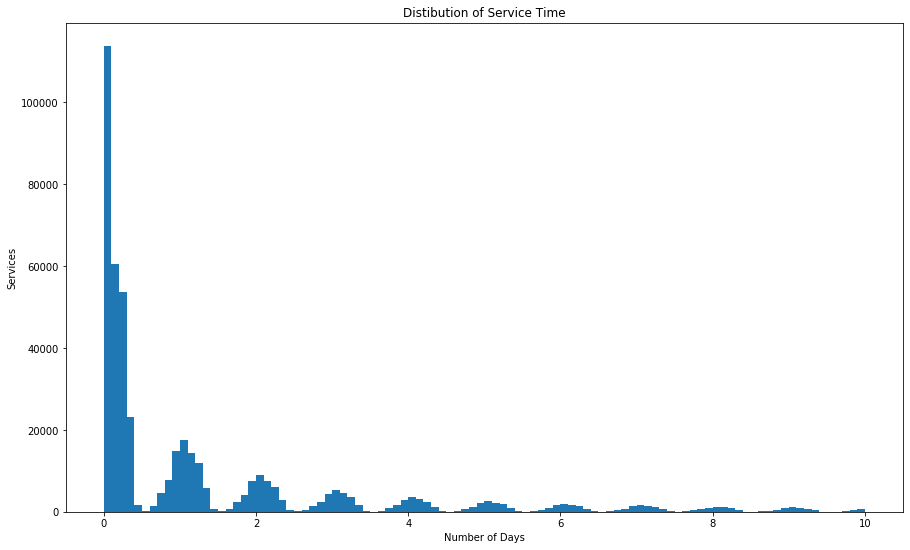

In [13]:
plt.figure(figsize=(15,9))
plt.title('Distibution of Service Time')
plt.hist(invoice_plant['Service Time'].astype('timedelta64[s]')/86400, bins=100, range=[0,10])
plt.xlabel('Number of Days')
plt.ylabel('Services')
plt.show()

In [14]:
invoice_plant.columns

Index(['Unnamed: 0', 'Amt Rcvd From Custom', 'Amt Rcvd From Ins Co',
       'Area / Locality', 'CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)',
       'CITY', 'Cash /Cashless Type', 'Claim No.', 'Cust Type', 'Customer No.',
       'District', 'Expiry Date', 'Gate Pass Date', 'Gate Pass Time',
       'IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
       'Invoice Date', 'Invoice No', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Outstanding Amt', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
       'Policy no.', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
       'Service Advisor Name', 'TDS amount', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total CGST', 'Total GST', 'Total IGST',
       'Total SGST/UGST', 'Total Value', 'User ID', 'Invoi

Text(0.5, 0, 'Service Time in days')

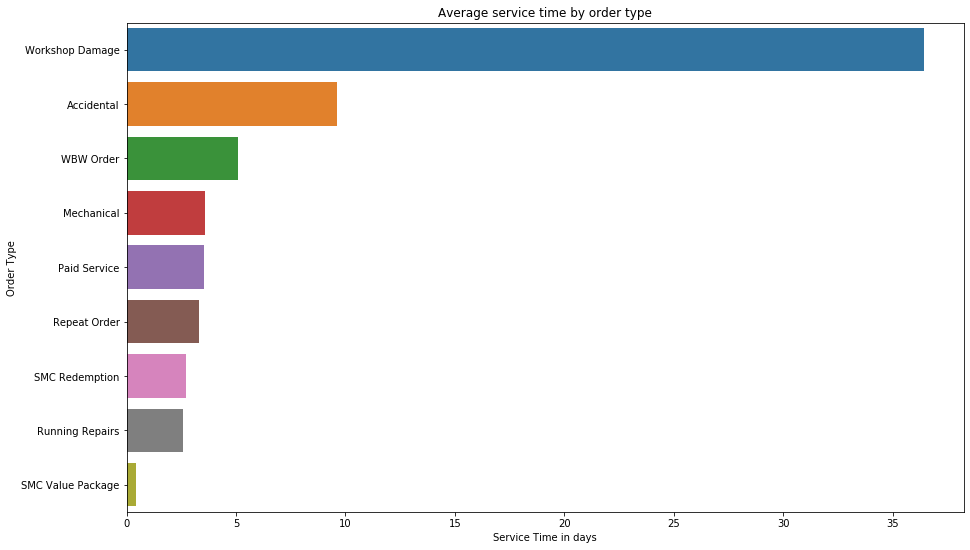

In [15]:
invoice_plant['Service Time'] = invoice_plant['Service Time'].astype('timedelta64[s]')

st_by_order_type = invoice_plant[['Order Type', 'Service Time']].groupby('Order Type').mean().reset_index()

st_by_order_type.sort_values(by='Service Time', inplace=True, ascending=False)

st_by_order_type['Service Time'] = st_by_order_type['Service Time']/86400

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Average service time by order type')
ax = sns.barplot(x='Service Time', y='Order Type', data=st_by_order_type)
ax.set_xlabel('Service Time in days')

Text(0.5, 0, 'Service Time in days')

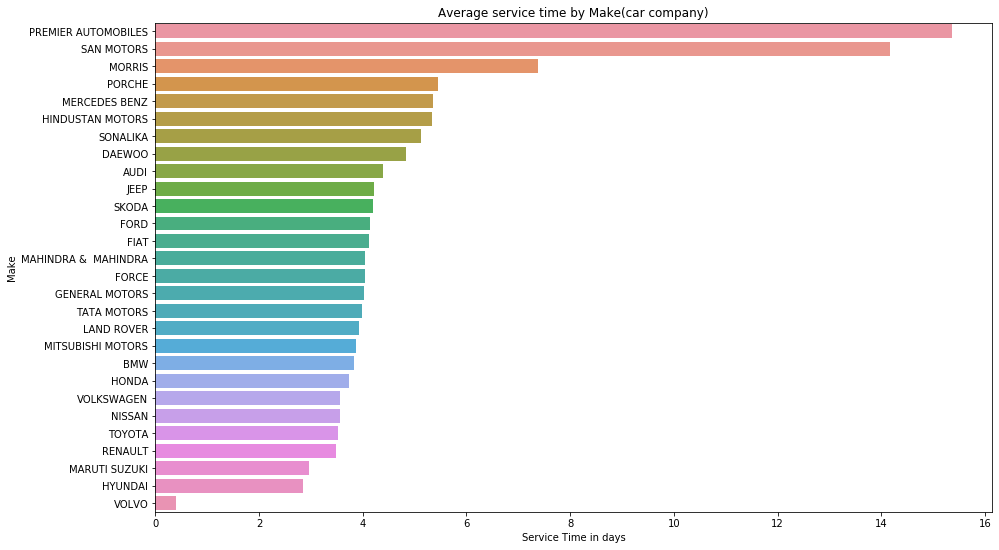

In [17]:
invoice_plant['Service Time'] = invoice_plant['Service Time'].astype('timedelta64[s]')

st_by_make = invoice_plant[['Make', 'Service Time']].groupby('Make').mean().reset_index()

st_by_make.sort_values(by='Service Time', inplace=True, ascending=False)

st_by_make['Service Time'] = st_by_make['Service Time']/86400

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Average service time by Make(car company)')
ax = sns.barplot(x='Service Time', y='Make', data=st_by_make)
ax.set_xlabel('Service Time in days')

In [18]:
invoice_plant.columns

Index(['Unnamed: 0', 'Amt Rcvd From Custom', 'Amt Rcvd From Ins Co',
       'Area / Locality', 'CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)',
       'CITY', 'Cash /Cashless Type', 'Claim No.', 'Cust Type', 'Customer No.',
       'District', 'Expiry Date', 'Gate Pass Date', 'Gate Pass Time',
       'IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
       'Invoice Date', 'Invoice No', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Outstanding Amt', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
       'Policy no.', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
       'Service Advisor Name', 'TDS amount', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total CGST', 'Total GST', 'Total IGST',
       'Total SGST/UGST', 'Total Value', 'User ID', 'Invoi

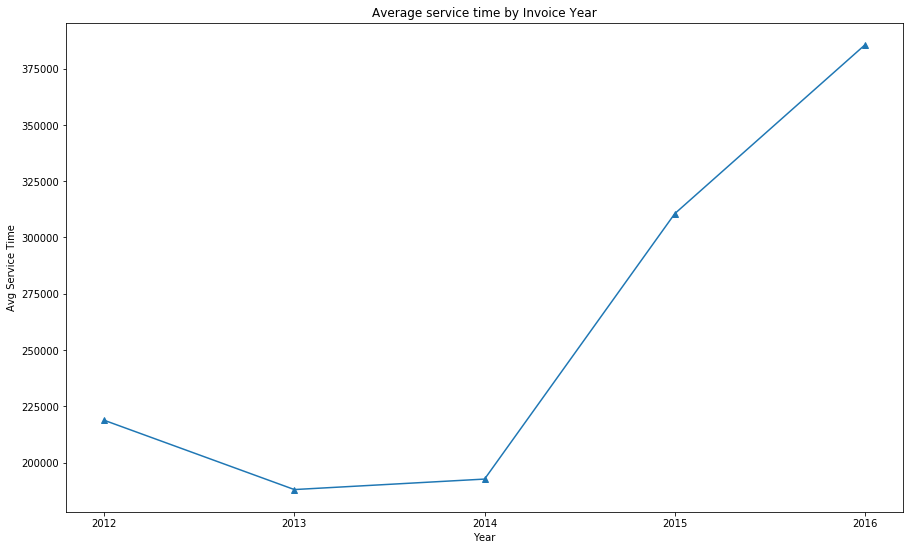

In [19]:
st_by_year = invoice_plant[[ 'Service Time','Invoice Year']].groupby('Invoice Year').mean().reset_index()
plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
line = plt.plot(st_by_year['Invoice Year'], st_by_year['Service Time'],marker='^')
plt.title('Average service time by Invoice Year')
plt.xlabel('Year')
plt.ylabel('Avg Service Time')
labels = ['2012','2013','2014','2015','2016']
plt.xticks(st_by_year['Invoice Year'],labels)
plt.show()

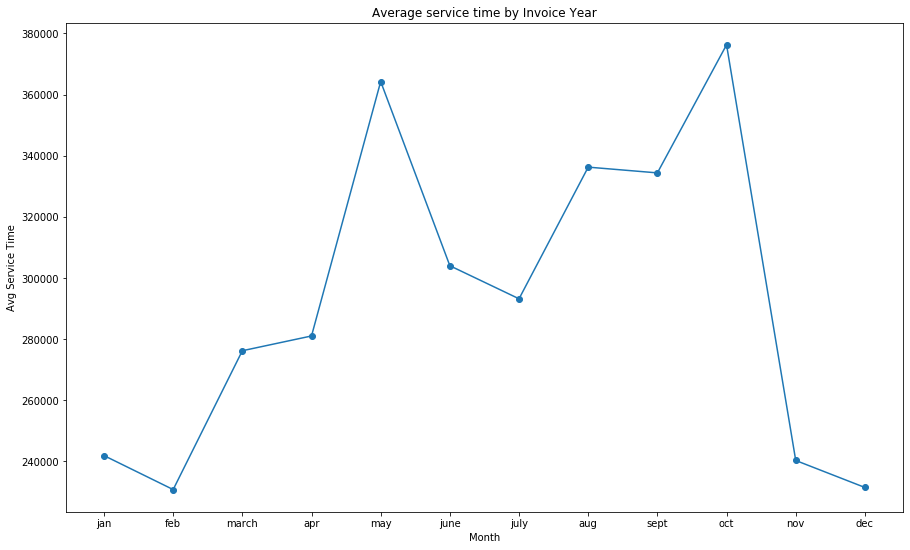

In [26]:
st_by_year = invoice_plant[[ 'Service Time','Invoice Month']].groupby('Invoice Month').mean().reset_index()
plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
line = plt.plot(st_by_year['Invoice Month'], st_by_year['Service Time'],marker='o')
plt.title('Average service time by Invoice Year')
plt.xlabel('Month')
plt.ylabel('Avg Service Time')
labels = ['jan','feb','march','apr','may','june','july','aug','sept','oct','nov','dec']
plt.xticks(st_by_year['Invoice Month'],labels)
plt.show()

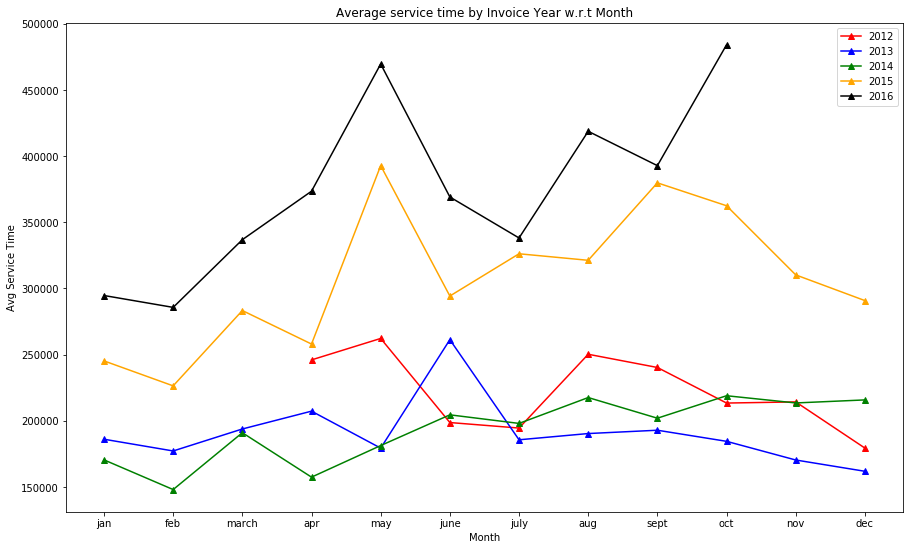

In [21]:
st_by_qut_2012 =  invoice_plant[invoice_plant['Invoice Year']==2012][['Invoice Month','Service Time']].groupby('Invoice Month').mean().reset_index()
st_by_qut_2013 =  invoice_plant[invoice_plant['Invoice Year']==2013][['Invoice Month','Service Time']].groupby('Invoice Month').mean().reset_index()
st_by_qut_2014 =  invoice_plant[invoice_plant['Invoice Year']==2014][['Invoice Month','Service Time']].groupby('Invoice Month').mean().reset_index()
st_by_qut_2015 =  invoice_plant[invoice_plant['Invoice Year']==2015][['Invoice Month','Service Time']].groupby('Invoice Month').mean().reset_index()
st_by_qut_2016 =  invoice_plant[invoice_plant['Invoice Year']==2016][['Invoice Month','Service Time']].groupby('Invoice Month').mean().reset_index()



plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
line1 = plt.plot(st_by_qut_2012['Invoice Month'], st_by_qut_2012['Service Time'],marker='^',color='red',label='Services')
line2 = plt.plot(st_by_qut_2013['Invoice Month'], st_by_qut_2013['Service Time'],marker='^',color='blue',label='Services')
line3 = plt.plot(st_by_qut_2014['Invoice Month'], st_by_qut_2014['Service Time'],marker='^',color='green',label='Services')
line4 = plt.plot(st_by_qut_2015['Invoice Month'], st_by_qut_2015['Service Time'],marker='^',color='orange',label='Services')
line5 = plt.plot(st_by_qut_2016['Invoice Month'], st_by_qut_2016['Service Time'],marker='^',color='black',label='Services')


plt.title('Average service time by Invoice Year w.r.t Month')
plt.xlabel('Month')
plt.ylabel('Avg Service Time')
plt.legend(['2012','2013','2014','2015','2016'])
labels = ['jan','feb','march','apr','may','june','july','aug','sept','oct','nov','dec']
plt.xticks(st_by_year['Invoice Month'],labels)
plt.show()